<a href="https://colab.research.google.com/github/YannisZang/CS_5864/blob/main/HW1/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this part, you will create your own filter bank. This filter bank will consist of 48 filters, each of size 49x49 pixels, designed to extract various image features. You will construct filters for first and second derivatives of Gaussians at different orientations and scales, Laplacian of Gaussian (LOG) filters, and Gaussian filters. These filters will be applied to a sample image, hokie.jpg Download hokie.jpg, to visualize their responses.



1.   Filter bank construction:

*   Create a filter bank with 48 filters, each of size 49x49 pixels. The filter bank should consist of the following types of filters:


1.   First and second derivatives of Gaussians (DoG) at 6 orientations and 3 scales, totaling 36 filters.
2.   8 Laplacian of Gaussian (LOG) filters.
3.   4 Gaussian filters.
4.   The filters occur at basic scales σ ={1, √2, 2, 2√2}. The first and second derivative filters occur at the first three scales with an elongation factor of 3 (i.e. σx = σ and σy = 2σx). The Gaussians occur at the four basic scales while the 8 LOG filters occur at σ and 3σ.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import io, color

orientations = [0, 30, 60, 90, 120, 150]
scales = [1, np.sqrt(2), 2, 2*np.sqrt(2)]

# # h(u, v) for DoG
# def gaussian_DoG(x: int, y: int, scale: float):
#   return np.exp(-(x**2 + y**2) / 2 * scale**2) / (2*np.pi*scale**2)


# h(u, v) for gaussian filters
def gaussian(x: int, y: int, scale_x: float, scale_y: float):
  return np.exp(-(x**2 / (2 * scale_x**2) + y**2 / (2 * scale_y**2))) / (2 * np.pi * scale_x * scale_y)


# DoG filters
def DoG(size: int, scale, elongation: int, orientation, order: int, derivative):

  radius = size // 2
  x, y = np.meshgrid(np.arange(-radius, radius+1), np.arange(-radius, radius+1))

  degree = np.radians(orientation)

  x_rotate = x * np.cos(degree) - y * np.sin(degree)
  y_rotate = x * np.sin(degree) + y * np.cos(degree)

  g = gaussian(x_rotate, y_rotate, scale, scale * elongation)

  if order == 1:
    if derivative == 'x':
      filter = -x_rotate / (scale**2) * g
    elif derivative == 'y':
      filter = -y_rotate / ((scale * elongation)**2) * g

  elif order == 2:
    if derivative == 'x':
      filter = (x_rotate**2 - scale**2) / (scale**4) * g
    elif derivative == 'y':
      filter = (y_rotate**2 - (scale*elongation)**2) / ((scale*elongation)**4) * g

  return filter



In [ ]:
# 8 Laplacian of Gaussian (LOG) filters
def LoG(size: int, scale: any):
  radius = size // 2
  x, y = np.meshgrid(np.arange(-radius, radius+1), np.arange(-radius, radius+1))

  g = gaussian(x, y, scale, scale)

  filter = ((x**2) + (y**2) - 2 * scale**2) / (scale**4) * g

  return filter

# 4 Gaussian filters
def Gau(size: int, scale: any):
  radius = size // 2
  x, y = np.meshgrid(np.arange(-radius, radius+1), np.arange(-radius, radius+1))

  g = gaussian(x, y, scale, scale)

  return g


# visualization

def display(img: list, titles: list, cols: int):

  n = len(img)

  rows = (len(img) + cols - 1) // cols

  fig, axes = plt.subplots(rows, cols, figsize=(24,24))
  for i, ax in enumerate(axes.flat):
      ax.imshow(img[i], cmap="gray")
      ax.set_title(titles[i], fontsize=8)
  plt.show()


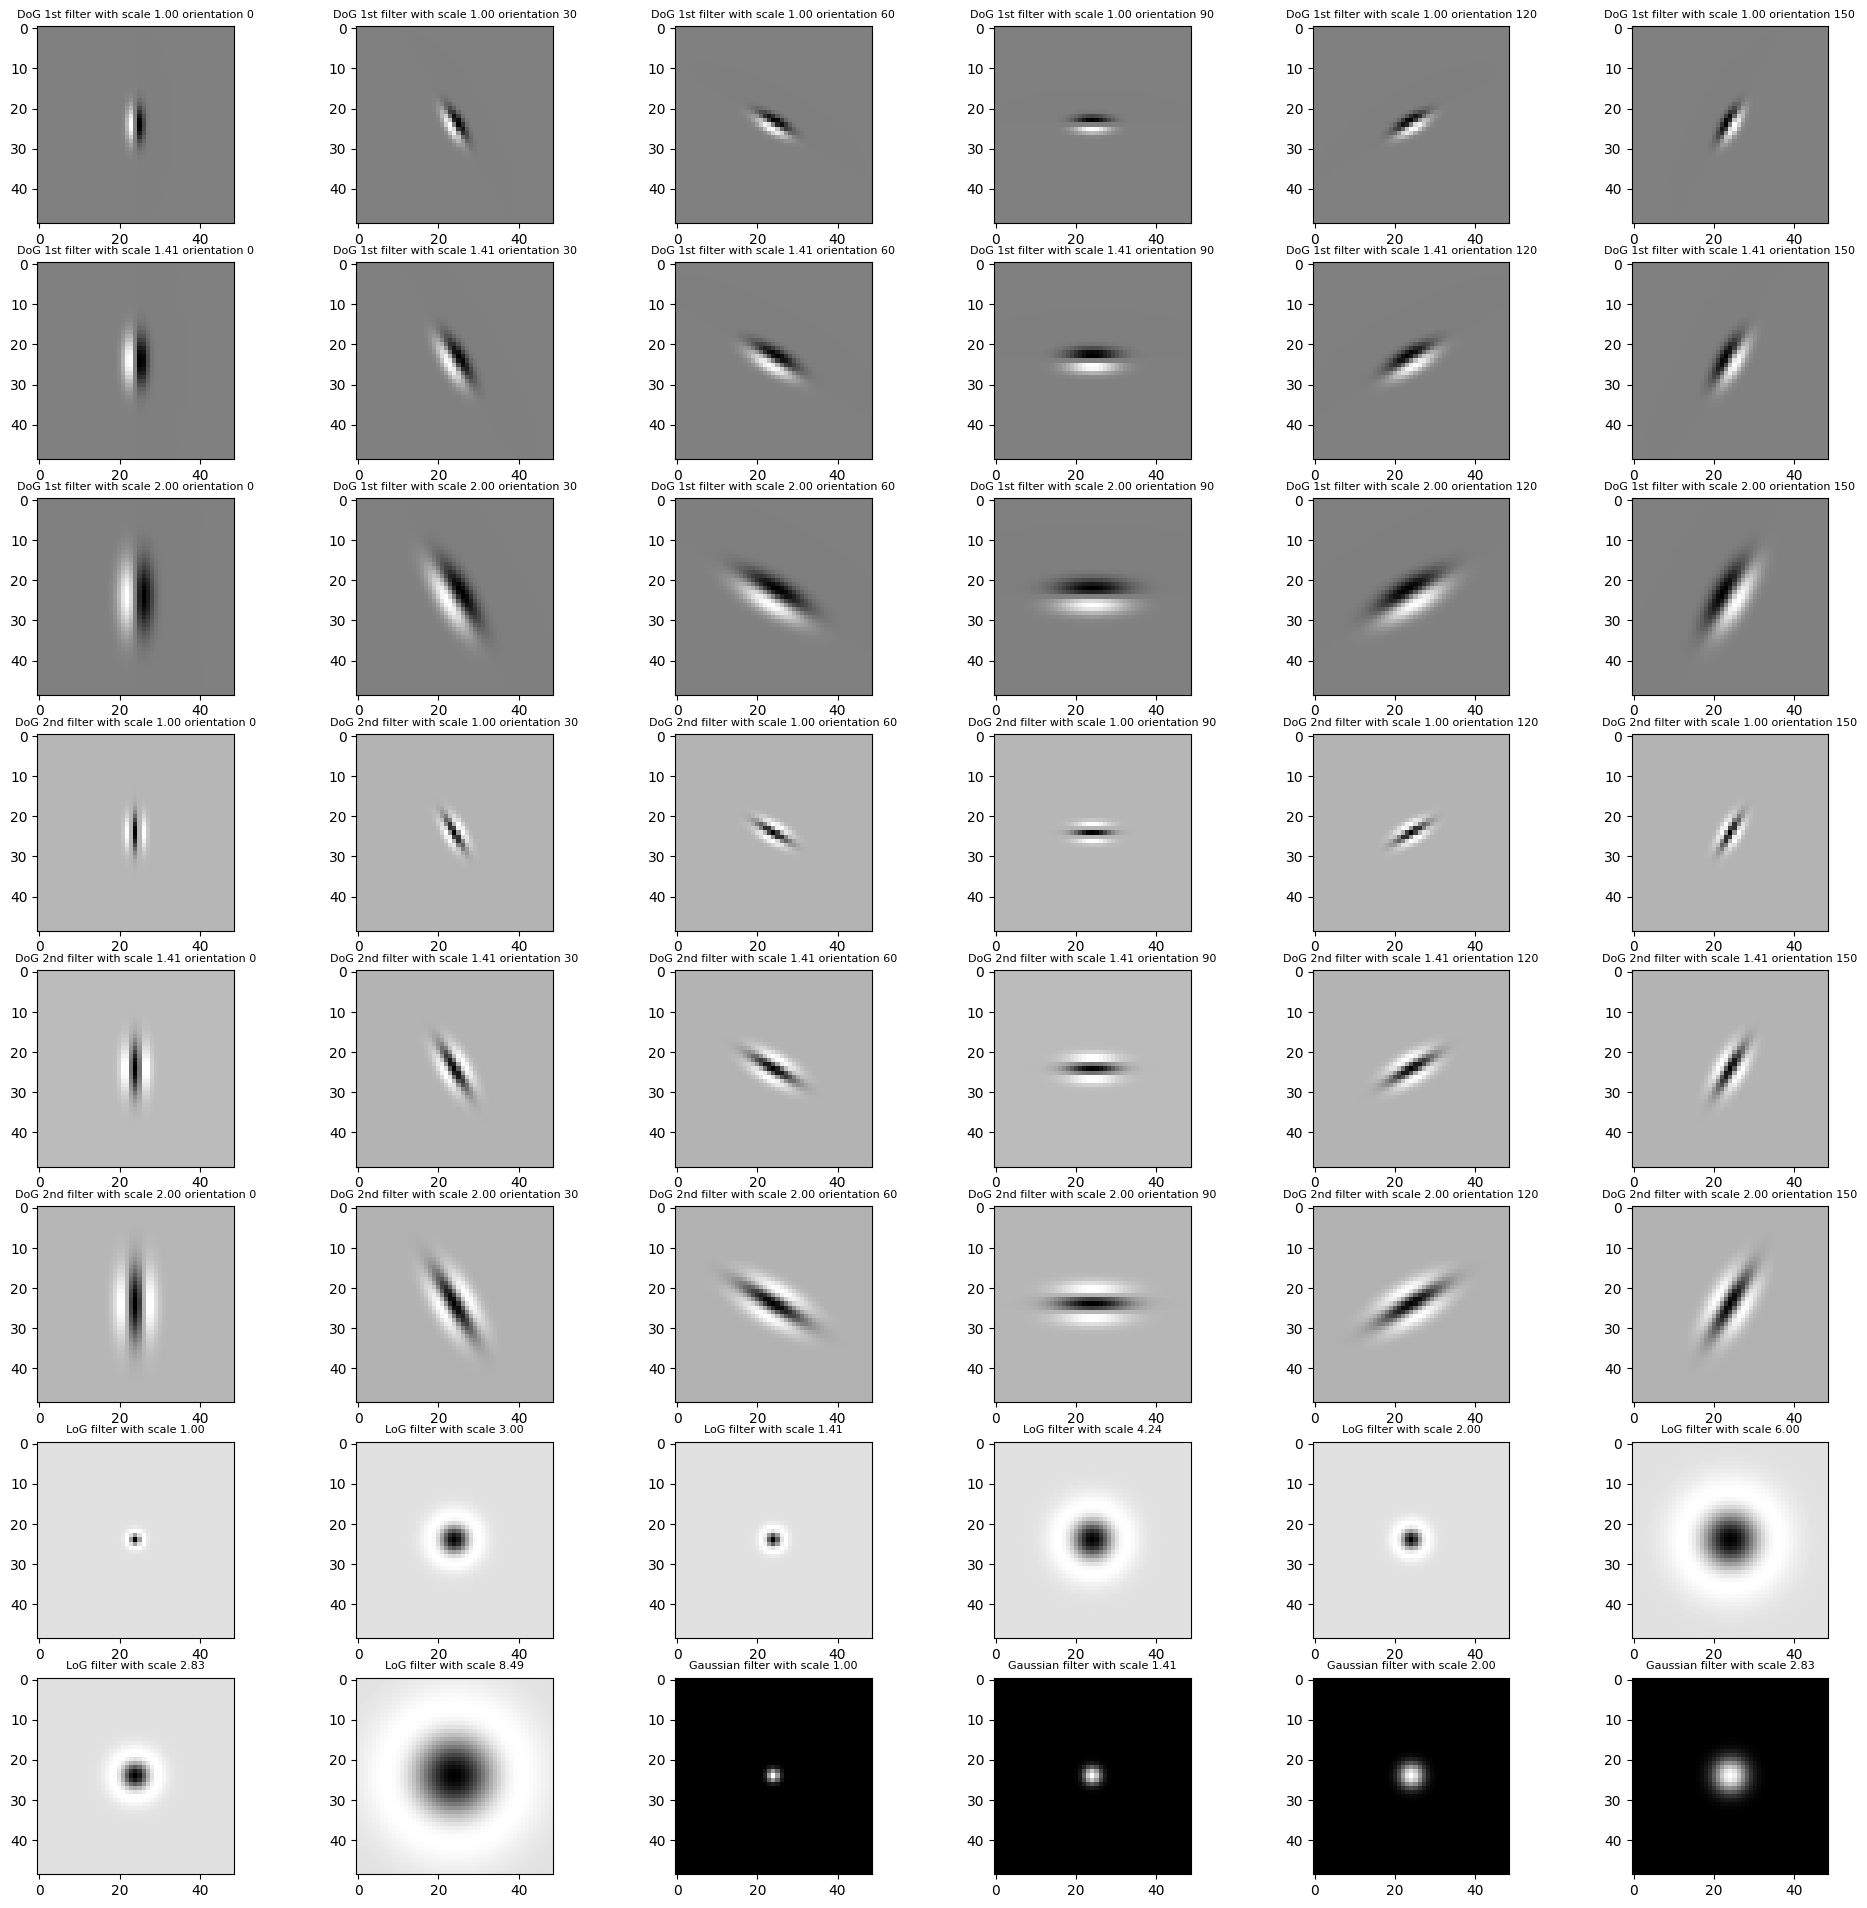

In [ ]:
filter_bank = []
titles = []

# DoG filters 1st derivative at x
for i in range(3):
  for degree in orientations:
    filter_bank.append(DoG(size=49, scale=scales[i], elongation=3, orientation=degree, order=1, derivative='x'))
    titles.append(f"DoG 1st filter with scale {scales[i]:.2f} orientation {degree}")

# DoG filters 2nd derivative at x
for i in range(3):
  for degree in orientations:
    filter_bank.append(DoG(size=49, scale=scales[i], elongation=3, orientation=degree, order=2, derivative='x'))
    titles.append(f"DoG 2nd filter with scale {scales[i]:.2f} orientation {degree}")

# LoG filters

for i in range(4):
  filter_bank.append(LoG(size=49, scale=scales[i]))
  titles.append(f"LoG filter with scale {scales[i]:.2f}")
  filter_bank.append(LoG(size=49, scale=3*scales[i]))
  titles.append(f"LoG filter with scale {3*scales[i]:.2f}")

for i in range(4):
  filter_bank.append(Gau(size=49, scale=scales[i]))
  titles.append(f"Gaussian filter with scale {scales[i]:.2f}")


# visualization
display(filter_bank, titles, 6)



2.   Filter application:


*   Run each filter from your bank on the hokie.jpg image using the ndimage.convolveLinks to an external site. function. Students do not need to write code to perform convolution. You should convert the image to grayscale first.
*   For each filter, visualize the response of the filter applied to the image. You can use visualizations such as heatmaps or grayscale images to represent the responses. Specifically, show the filter and the response for all the filters.






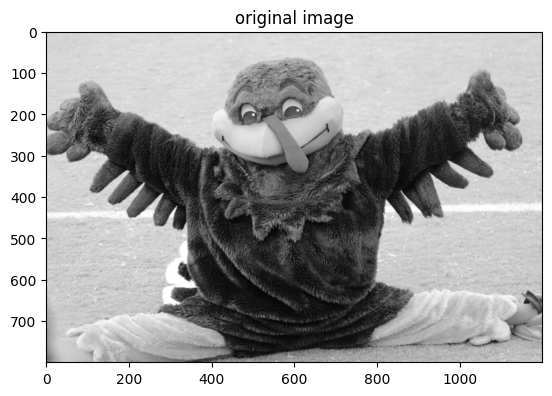

In [ ]:
# input image

def input_img(filepath):
  img = io.imread(filepath)
  img = color.rgb2gray(img)
  return img

img = input_img(filepath="/content/sample_data/hokie-1.jpg")

plt.imshow(img, cmap="gray")
plt.title("original image")
plt.show()

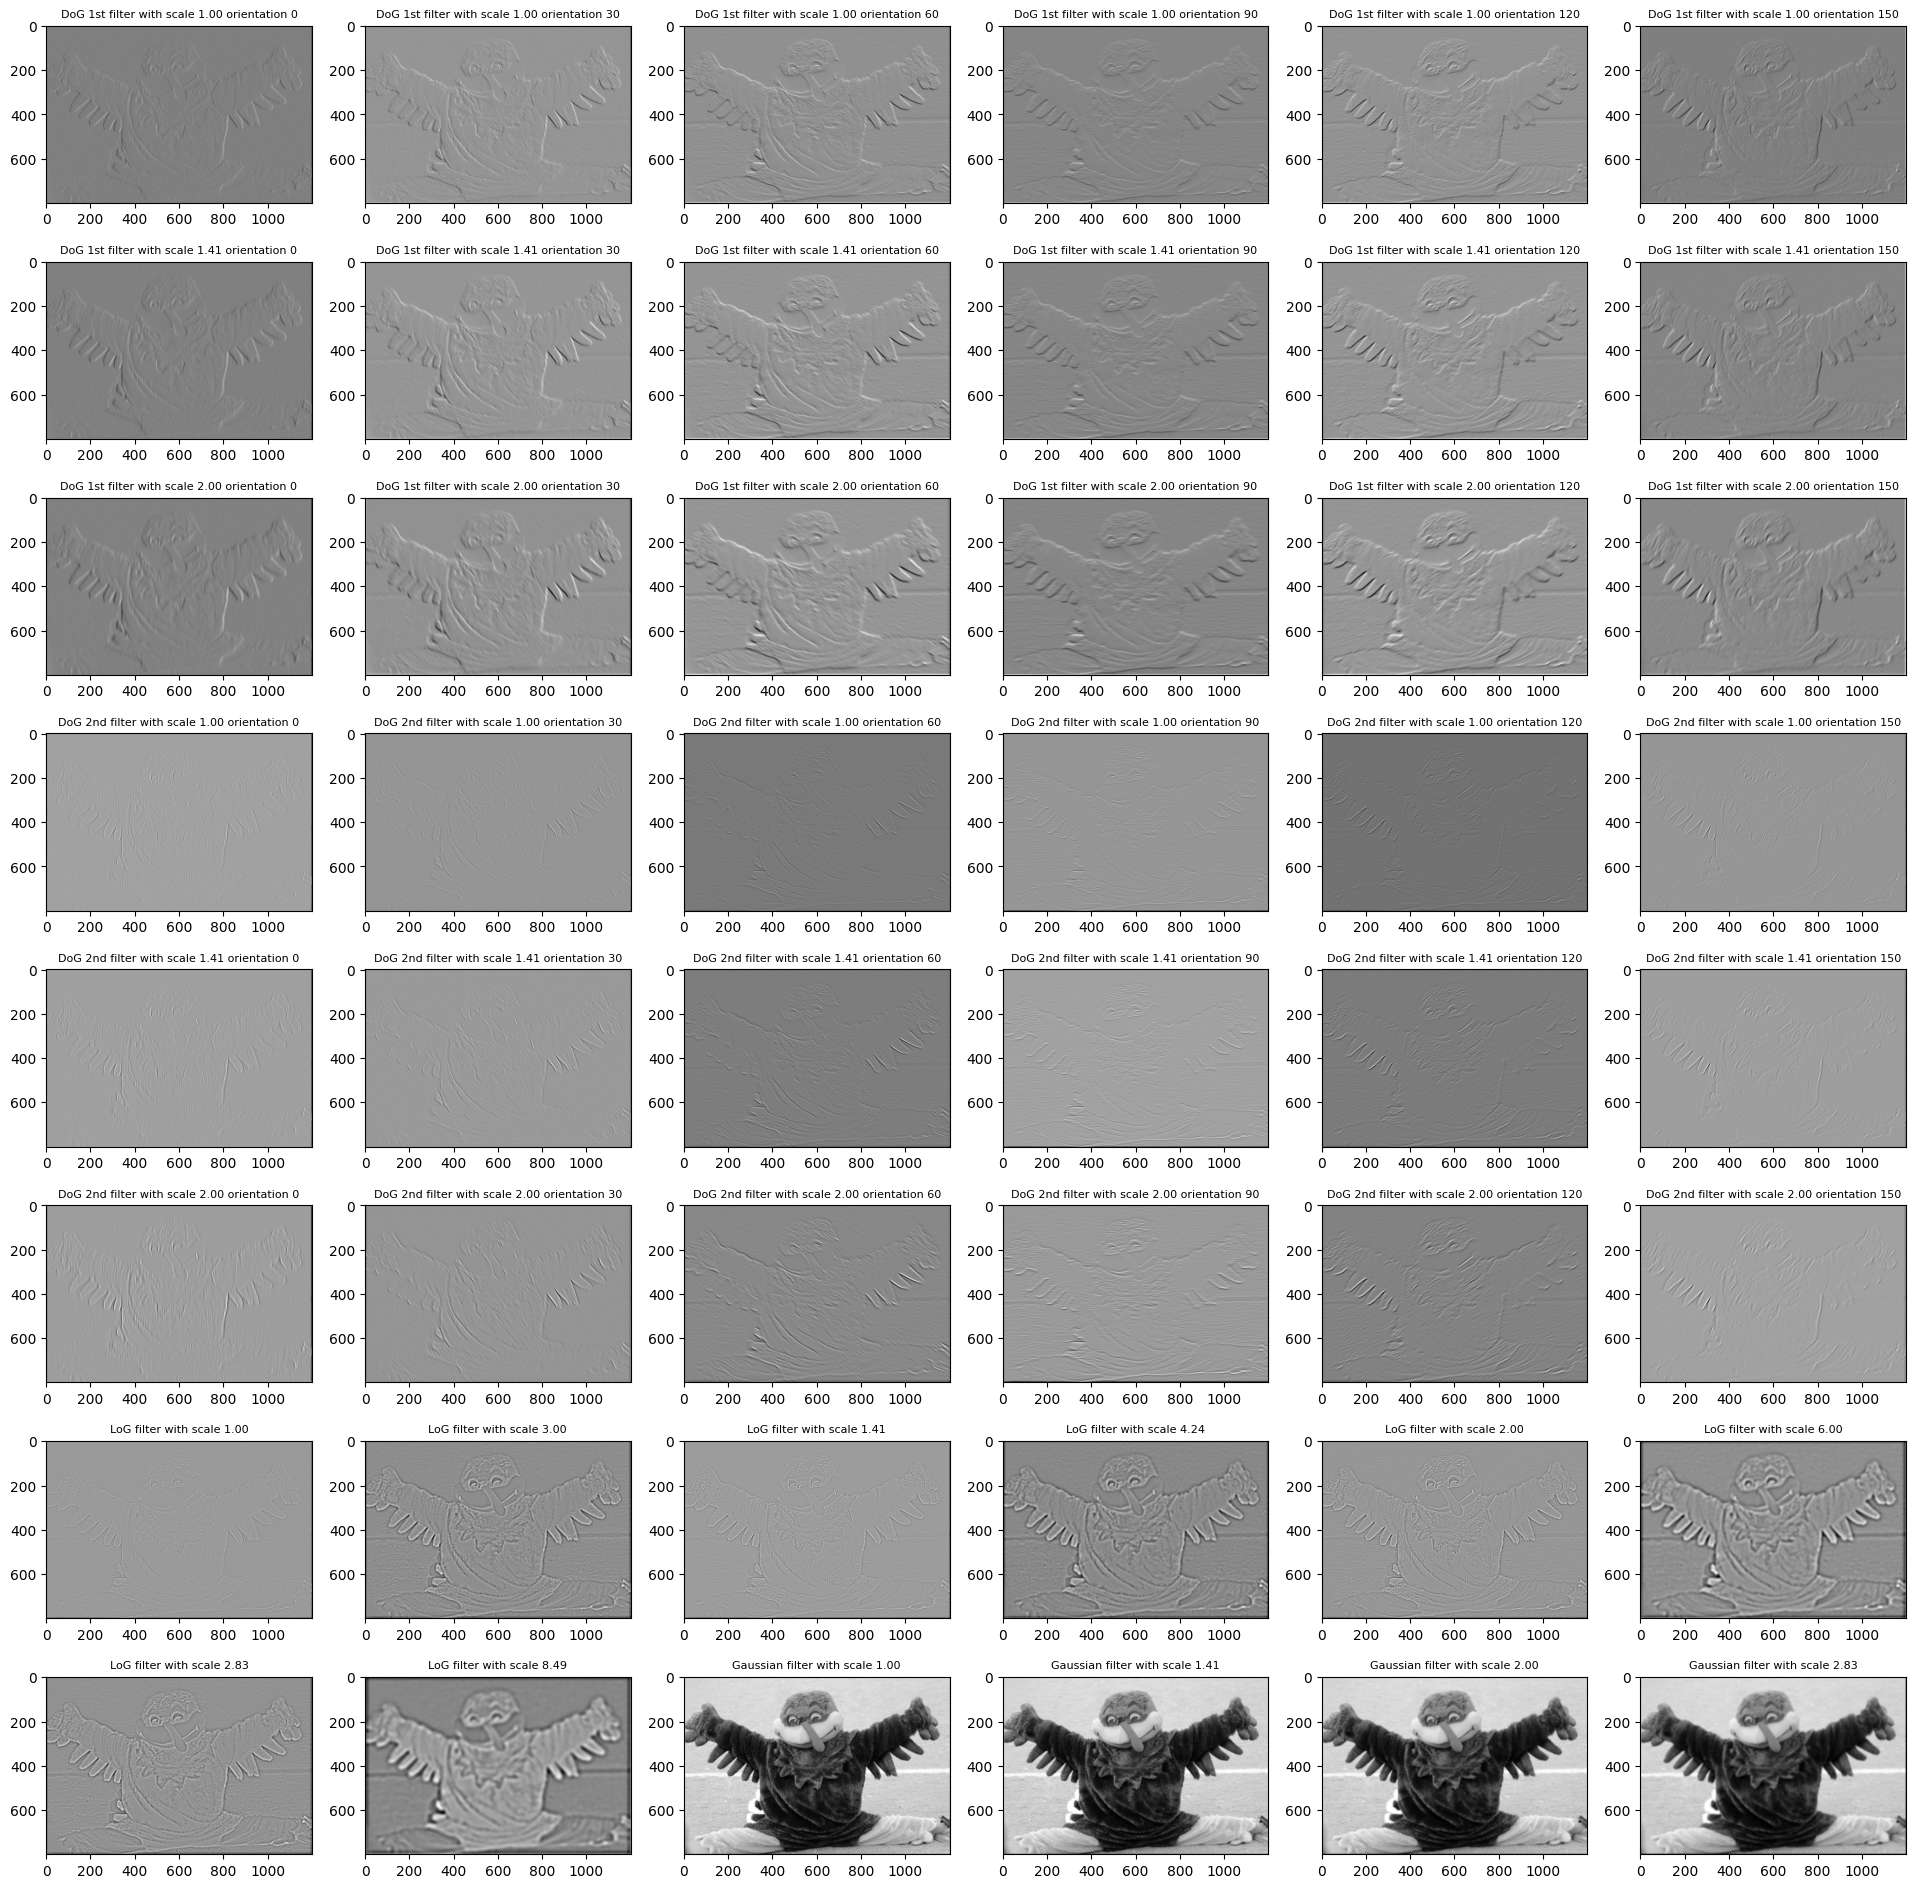

In [ ]:
from scipy import ndimage

modified_img = []


for idx in range(len(filter_bank)):
  modified_img.append(ndimage.convolve(img, filter_bank[idx], mode='constant', cval=0))


# visualization
display(modified_img, titles, 6)



# 1st derivative

Gaussian

$$
G(x,y;\sigma) \;=\; \frac{1}{2\pi\sigma^2}\,\exp\!\Big(-\frac{x^2+y^2}{2\sigma^2}\Big).
$$

**for $x$ chain rule：**


$$
C \;=\; \frac{1}{2\pi\sigma^2},
\qquad
f(x,y) \;=\; -\frac{x^2+y^2}{2\sigma^2},
$$

Then

$$
G(x,y) \;=\; C\,e^{f(x,y)}.
$$

chain：

$$
\frac{\partial G}{\partial x}
= C\,\frac{\partial}{\partial x}\!\big(e^{f(x,y)}\big)
= C\,e^{f(x,y)}\,\frac{\partial f}{\partial x}
= G(x,y)\,\frac{\partial f}{\partial x}.
$$

Then

$$
\frac{\partial f}{\partial x}
= -\frac{1}{2\sigma^2}\cdot 2x
= -\frac{x}{\sigma^2}.
$$

then

$$
\boxed{\;\frac{\partial G}{\partial x}
= -\frac{x}{\sigma^2}\,G(x,y;\sigma)\;}
$$

**For $y$：**

$$
\boxed{\;\frac{\partial G}{\partial y}
= -\frac{y}{\sigma^2}\,G(x,y;\sigma)\;}
$$




# 2nd derivative gaussian


$$
G(x,y;\sigma) \;=\; \frac{1}{2\pi\sigma^2}\exp\!\Big(-\frac{x^2+y^2}{2\sigma^2}\Big).
$$


## for x

$$
\frac{\partial G}{\partial x}
$$

$$
\frac{\partial G}{\partial x} = -\frac{x}{\sigma^2} G.
$$

then:

$$
\frac{\partial^2 G}{\partial x^2}
= \frac{\partial}{\partial x}\Big(-\frac{x}{\sigma^2}G\Big).
$$

then:

$$
\frac{\partial^2 G}{\partial x^2}
= -\frac{1}{\sigma^2}G - \frac{x}{\sigma^2}\frac{\partial G}{\partial x}.
$$

$$
\frac{\partial G}{\partial x} = -\tfrac{x}{\sigma^2}G
$$

$$
\frac{\partial^2 G}{\partial x^2}
= -\frac{1}{\sigma^2}G + \frac{x^2}{\sigma^4}G.
$$

final：

$$
\boxed{\;\frac{\partial^2 G}{\partial x^2}
= \Big(\frac{x^2}{\sigma^4} - \frac{1}{\sigma^2}\Big) G(x,y;\sigma)\;}
$$

---

## for $y$



$$
\boxed{\;\frac{\partial^2 G}{\partial y^2}
= \Big(\frac{y^2}{\sigma^4} - \frac{1}{\sigma^2}\Big) G(x,y;\sigma)\;}
$$

---

# LoG

$$
\nabla^2 G
= \frac{\partial^2 G}{\partial x^2} + \frac{\partial^2 G}{\partial y^2}.
$$


$$
\nabla^2 G
= \Big(\frac{x^2}{\sigma^4} - \frac{1}{\sigma^2}\Big)G
+ \Big(\frac{y^2}{\sigma^4} - \frac{1}{\sigma^2}\Big)G.
$$


$$
\nabla^2 G
= \Big(\frac{x^2+y^2}{\sigma^4} - \frac{2}{\sigma^2}\Big)G(x,y;\sigma).
$$

---

# Final

$$
\frac{\partial^2 G}{\partial x^2}
= \Big(\frac{x^2}{\sigma^4} - \frac{1}{\sigma^2}\Big) G
$$

$$
\frac{\partial^2 G}{\partial y^2}
= \Big(\frac{y^2}{\sigma^4} - \frac{1}{\sigma^2}\Big) G
$$

$$
\nabla^2 G \;=\; \Big(\frac{x^2+y^2}{\sigma^4} - \frac{2}{\sigma^2}\Big) G
$$



In [ ]:
import pickle

save_path = "/content/filter_bank.pkl"

with open(save_path, "wb") as f:
    pickle.dump(filter_bank, f)

save_path = "/content/titles.pkl"

with open(save_path, "wb") as f:
    pickle.dump(titles, f)

save_path = "/content/filtered_img.pkl"

with open(save_path, "wb") as f:
    pickle.dump(modified_img, f)



